In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import folium
import json
import csv

plt.rc('font', family='NanumBarunGothic') 

In [65]:
# 파일 불러오는 코랩 코드
park = pd.read_csv('서울공원전처리.csv')

# 1. 자치구별 공원 면적과 공원수

In [138]:
park

,공원명,지역,경도,위도,면적,분류,크기
0,남산도시자연공원,중구,126.990377,37.550140,2896887,대형,15
1,길동생태공원,강동구,127.154779,37.540394,80683,소형,3
2,서울대공원,과천시,127.019846,37.426449,9132690,대형,15
3,서울숲,성동구,127.041798,37.543072,480994,중형,7
4,월드컵공원,마포구,126.878907,37.571805,2284085,대형,15
...,...,...,...,...,...,...,...
126,서일대뒷산공원,중랑구,127.098782,37.587716,631021,중형,7
127,용마도시자연공원(사가정공원),중랑구,127.095997,37.579762,109635,중형,7
128,문화비축기지,마포구,126.893246,37.571718,140022,중형,7
129,경춘선숲길,노원구,127.076482,37.627077,211392,중형,7


In [139]:
df = park.groupby('지역')[['면적']].agg(['sum', 'count'])
df.drop(index='과천시', inplace=True)
df.columns = ['공원면적', '공원수']

In [119]:
df.head()

,공원면적,공원수
지역,,
강남구,3626398,7
강동구,1526390,7
강북구,3714902,4
강서구,2194154,9
관악구,10431453,2


# 2. 구별 공원 면적 비율 및 인당 공원 면적 비교

In [140]:
df2 = pd.read_csv('서울시 인구와 면적.txt', sep = "\t")
df2.drop(index=0, inplace=True)

In [41]:
# 1. 인덱스를 없애고
# 2. '지역' 컬럼 인덱스
# 3. 인구와 면적 공원수를 합침 merge join concat
# 컬럼은 [지역 공원면적 공원수 인구 면적]

In [141]:
df2.set_index('지역', inplace=True)
df2

,기간,인구,면적,인구밀도(명/㎢)
지역,,,,
종로구,2020,"158,996",23.91,"6,649"
중구,2020,"134,635",9.96,"13,517"
용산구,2020,"244,645",21.87,"11,188"
성동구,2020,"300,505",16.86,"17,822"
광진구,2020,"360,109",17.06,"21,105"
동대문구,2020,"357,014",14.22,"25,114"
중랑구,2020,"399,562",18.50,"21,603"
성북구,2020,"447,056",24.58,"18,190"
강북구,2020,"311,569",23.60,"13,202"


In [142]:
df = df.join(df2[['인구','면적']])
df

,공원면적,공원수,인구,면적
지역,,,,
강남구,3626398,7,"544,055",39.50
강동구,1526390,7,"463,998",24.59
강북구,3714902,4,"311,569",23.60
강서구,2194154,9,"585,901",41.44
관악구,10431453,2,"509,803",29.57
광진구,584002,2,"360,109",17.06
구로구,1617657,4,"432,488",20.12
금천구,57568,4,"247,835",13.02
노원구,12235699,3,"527,032",35.44


In [ ]:
# 4. 면적 * 1000000
# 5. 면적비율, 인당면적

In [143]:
df.면적 = df.면적 * 1000000
df.인구 = df.인구.apply(lambda x : int(x.replace(',', '')))

In [144]:
df['면적비율'] = df.공원면적 / df.면적 * 100
df['인당면적'] = df.공원면적 / df.인구

In [ ]:
# 6. 시각화 barh - 자치구별 공원면적 비율

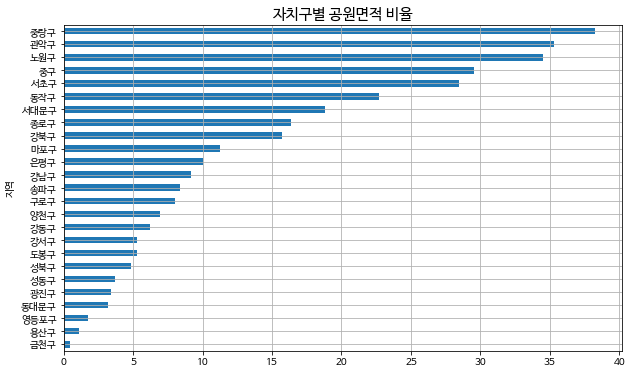

In [145]:
df.면적비율.sort_values().plot(kind='barh', grid=True, figsize=(10,6))
plt.title('자치구별 공원면적 비율', size=15)
plt.show()

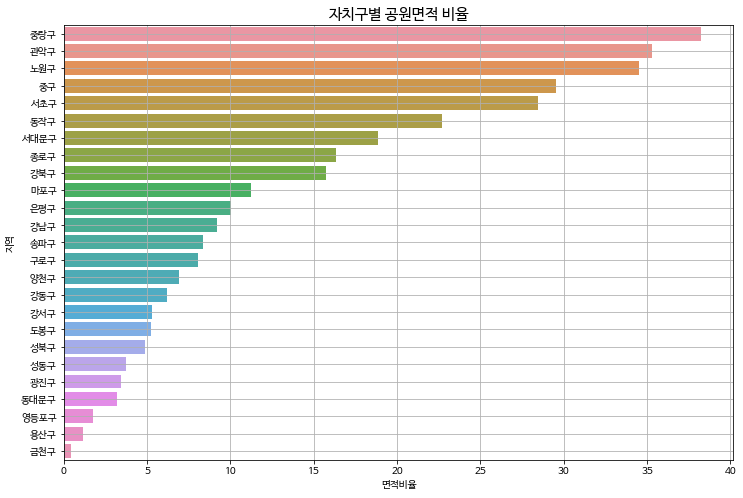

In [146]:
plt.figure(figsize=(12,8))
order = df.면적비율.sort_values(ascending=False).index
sns.barplot(x='면적비율', y=df.index, data=df, order=order)
plt.grid()
plt.title('자치구별 공원면적 비율', size=15)
plt.show()

In [ ]:
# 7. 시각화 barh - 인당 공원면적 높은순으로
# 8. 저장

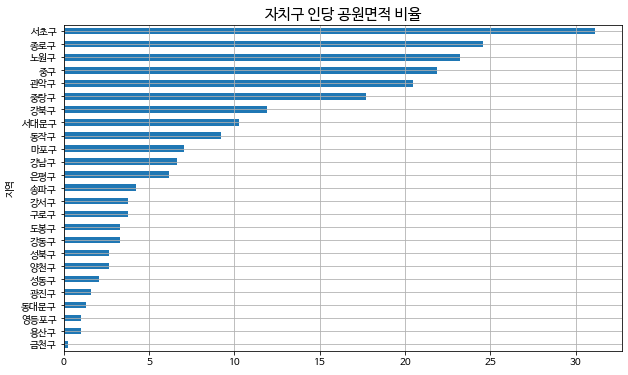

In [147]:
df.인당면적.sort_values().plot(kind='barh', grid=True, figsize=(10,6))
plt.title('자치구 인당 공원면적 비율', size=15)
plt.show()

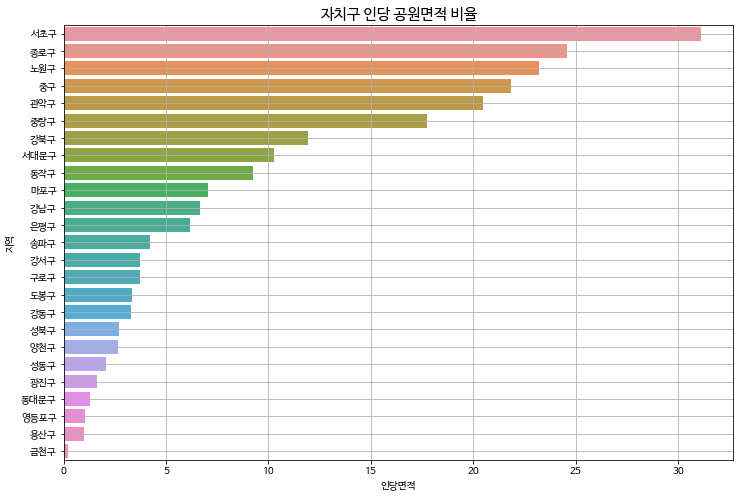

In [148]:
plt.figure(figsize=(12,8))
order = df.인당면적.sort_values(ascending=False).index
sns.barplot(x='인당면적', y=df.index, data=df, order=order)
plt.grid()
plt.title('자치구 인당 공원면적 비율', size=15)
plt.show()

In [149]:
df.to_csv('자치구별공원현황.csv')